In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df.describe() #currently only Sr No is int

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [7]:
#Lets drop useless columns
df.drop(columns=['Remarks','Sr No'],inplace=True)

In [8]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
#Rename columns
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'City  Location':'City',
    'Investors Name':'Investors',
    'InvestmentnType':'InvestmentType',
    'Amount in USD':'Amount'
},inplace=True)

In [10]:
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,City,Investors,InvestmentType,Amount
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [11]:
#creating new column based whether an startup is funded or not
df['is_funded']=df['Amount'].notnull().astype(int)

In [12]:
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,City,Investors,InvestmentType,Amount,is_funded
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",1
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",1
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",1
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",1
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",1


In [13]:
df['Amount'].value_counts()

Amount
10,00,000      165
5,00,000       108
20,00,000       69
30,00,000       66
50,00,000       66
              ... 
21,50,000        1
41,50,000        1
5,18,000         1
1,15,000         1
2,80,00,000      1
Name: count, Length: 471, dtype: int64

In [14]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [15]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [16]:
2084+960

3044

In [17]:
#calculate null values for city column
df['City'].value_counts()

City
Bangalore                 700
Mumbai                    567
New Delhi                 421
Gurgaon                   287
Bengaluru                 141
                         ... 
India / US                  1
\\xc2\\xa0Bangalore         1
\\xc2\\xa0Mumbai            1
New Delhi / California      1
Dallas / Hyderabad          1
Name: count, Length: 112, dtype: int64

In [18]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [19]:
df['City'].fillna('Unknown',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14536\3028396032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna('Unknown',inplace=True)


In [20]:
#for investors column
df['Investors']=df['Investors'].fillna('Undisclosed')


In [21]:
#for industry vertical column
df['Industry Vertical']=df['Industry Vertical'].fillna('Unknown')


In [22]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [23]:
df['Amount'].value_counts()

Amount
10,00,000      165
5,00,000       108
20,00,000       69
30,00,000       66
50,00,000       66
              ... 
21,50,000        1
41,50,000        1
5,18,000         1
1,15,000         1
2,80,00,000      1
Name: count, Length: 471, dtype: int64

In [24]:
df[df['Amount'].apply(lambda x: isinstance(x,str))]
#no string element

,Date,Startup Name,Industry Vertical,SubVertical,City,Investors,InvestmentType,Amount,is_funded
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",1
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",1
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",1
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",1
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",1
...,...,...,...,...,...,...,...,...,...
3038,28/01/2015,Grabhouse.com,Unknown,NaN,Unknown,"Kalaari Capital, Sequoia Capital",Private Equity,"25,00,000",1
3039,29/01/2015,Printvenue,Unknown,NaN,Unknown,Asia Pacific Internet Group,Private Equity,"45,00,000",1
3040,29/01/2015,Graphene,Unknown,NaN,Unknown,KARSEMVEN Fund,Private Equity,"8,25,000",1
3041,30/01/2015,Mad Street Den,Unknown,NaN,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",1


In [25]:
df['Amount'].isna().sum()

np.int64(960)

In [26]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  3044 non-null   object
 3   SubVertical        2108 non-null   object
 4   City               3044 non-null   object
 5   Investors          3044 non-null   object
 6   InvestmentType     3040 non-null   object
 7   Amount             2084 non-null   object
 8   is_funded          3044 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


In [28]:
df['is_funded'].value_counts()

is_funded
1    2084
0     960
Name: count, dtype: int64

In [29]:
def clean_amount(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip().lower()
        if x in ['undisclosed', 'unknown', 'n/a', 'nan', '']:
            return None
        try:
            return float(x)
        except:
            return None
    return x

df['Amount'] = df['Amount'].apply(clean_amount)


In [30]:
df['is_funded'] = df['Amount'].notnull().astype(int)


In [31]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [32]:
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,City,Investors,InvestmentType,Amount,is_funded
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,1
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,1
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,1
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,1
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,1


In [33]:
df['Amount'].value_counts

<bound method IndexOpsMixin.value_counts of 0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            NaN
3043       140000.0
Name: Amount, Length: 3044, dtype: float64>

In [34]:
#getting month and year data from column date
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y",errors='coerce')
df['Year']=df['Date'].dt.year.dropna().astype('Int64')
df['Month']=df['Date'].dt.month.dropna().astype('Int64')

In [35]:
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,City,Investors,InvestmentType,Amount,is_funded,Year,Month
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,1,2020,1
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,1,2020,1
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,1,2020,1
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,1,2020,1
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,1,2020,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3036 non-null   datetime64[ns]
 1   Startup Name       3044 non-null   object        
 2   Industry Vertical  3044 non-null   object        
 3   SubVertical        2108 non-null   object        
 4   City               3044 non-null   object        
 5   Investors          3044 non-null   object        
 6   InvestmentType     3040 non-null   object        
 7   Amount             2065 non-null   float64       
 8   is_funded          3044 non-null   int64         
 9   Year               3036 non-null   Int64         
 10  Month              3036 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 267.7+ KB


In [37]:
df['City'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'Unknown', 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'K

In [38]:
#clean city
df['City']=df['City'].str.strip().str.lower().replace({
    'new delhi':'delhi',
    'bangalore':'bengaluru'
})

In [39]:
df['City'].unique()

array(['bengaluru', 'gurgaon', 'delhi', 'mumbai', 'chennai', 'pune',
       'noida', 'faridabad', 'san francisco', 'san jose,', 'amritsar',
       'kormangala', 'tulangan', 'hyderabad', 'burnsville', 'menlo park',
       'gurugram', 'palo alto', 'santa monica', 'singapore', 'taramani',
       'andheri', 'chembur', 'nairobi', 'haryana', 'new york',
       'karnataka', 'mumbai/bengaluru', 'bhopal',
       'bengaluru and gurugram', 'india/singapore', 'jaipur', 'india/us',
       'nagpur', 'indore', 'new york, bengaluru', 'california', 'india',
       'ahemadabad', 'rourkela', 'srinagar', 'bhubneswar', 'chandigarh',
       'delhi & cambridge', 'kolkatta', 'kolkata', 'coimbatore',
       'udaipur', 'unknown', 'ahemdabad', 'bhubaneswar', 'ahmedabad',
       'surat', 'goa', 'uttar pradesh', 'nw delhi', 'gaya', 'vadodara',
       'trivandrum', 'missourie', 'panaji', 'gwalior', 'karur', 'udupi',
       'kochi', 'agra', 'bangalore/ bangkok', 'hubli', 'kerala',
       'kozhikode', 'us', 'siliguri

In [40]:
#clean industry vertical
df['Industry Vertical'].nunique()

822

In [41]:
df['Industry Vertical'].value_counts().head(30)

Industry Vertical
Consumer Internet            941
Technology                   478
eCommerce                    186
Unknown                      171
Healthcare                    70
Finance                       62
ECommerce                     61
Logistics                     32
E-Commerce                    29
Education                     24
Food & Beverage               23
Ed-Tech                       14
E-commerce                    12
FinTech                        9
IT                             8
Ecommerce                      8
Food and Beverage              6
Others                         6
Fin-Tech                       6
Real Estate                    6
Health and Wellness            5
Logistics Tech                 5
Online Food Delivery           5
Online Education Platform      5
Transportation                 4
Transport                      4
EdTech                         3
Services                       3
Food Delivery Platform         3
Food                     

In [42]:
df['Industry Vertical']=df['Industry Vertical'].str.strip().str.lower()

In [43]:
df['Industry Vertical'].value_counts().head(50)

Industry Vertical
consumer internet                           942
technology                                  478
ecommerce                                   258
unknown                                     171
healthcare                                   71
finance                                      62
e-commerce                                   41
logistics                                    32
education                                    24
food & beverage                              23
ed-tech                                      15
fintech                                      10
it                                            8
real estate                                   6
food and beverage                             6
fin-tech                                      6
others                                        6
health and wellness                           6
logistics tech                                5
online food delivery                          5
edtech                

In [44]:
df['Industry Vertical']=df['Industry Vertical'].replace({
    'ecommerce': 'e-commerce',
    'ed-tech': 'education',
    'edtech': 'education',
    'online food delivery': 'food & beverage',
    'food and beverage': 'food & beverage',
    'fin-tech': 'finance',
    'fintech': 'finance',
    'it': 'technology',
    'logistics tech': 'logistics',
    'health and wellness': 'healthcare',
    'consumer internet': 'consumer services',
    'unknown': 'others',
    'internet of things platform': 'technology',
    'social media': 'media & entertainment',
    'home services marketplace': 'consumer services',
    'digital media': 'media & entertainment',
    'online marketplace': 'e-commerce',
    'saas': 'technology',
    'hyperlocal handyman services': 'consumer services'

})

In [45]:
df['Industry Vertical'].value_counts().head(500)

Industry Vertical
consumer services                                     948
technology                                            492
e-commerce                                            301
others                                                177
finance                                                78
                                                     ... 
online identity verification services platform          1
corporate wellness app                                  1
fashion search & review platform                        1
hyperlocal maintenance, repair & cleaning services      1
pre-owned luxury online apparel seller                  1
Name: count, Length: 500, dtype: int64

In [46]:
df['Industry Vertical'].nunique()

783

In [47]:
def clean_and_group_industry(val):
    val = str(val).lower().strip()

    if 'e-commerce' in val or 'marketplace' in val:
        return 'e-commerce'
    elif 'fintech' in val or 'finance' in val or 'payments' in val:
        return 'finance'
    elif 'education' in val or 'edtech' in val:
        return 'education'
    elif 'health' in val or 'pharma' in val:
        return 'healthcare'
    elif 'food' in val or 'restaurant' in val or 'table reservation' in val:
        return 'food & beverage'
    elif 'logistics' in val or 'transport' in val:
        return 'logistics'
    elif 'media' in val or 'content' in val:
        return 'media & entertainment'
    elif 'tech' in val or 'platform' in val or 'saas' in val or 'software' in val or 'messaging' in val:
        return 'technology'
    elif 'service' in val or 'on-demand' in val or 'consumer' in val:
        return 'consumer services'
    elif 'real estate' in val:
        return 'real estate'
    else:
        return 'others'

df['Industry Vertical Cleaned'] = df['Industry Vertical'].apply(clean_and_group_industry)


In [48]:
df['Industry Vertical Cleaned'].nunique()

11

In [49]:
df['Industry Vertical Cleaned'].unique()

array(['technology', 'logistics', 'e-commerce', 'finance', 'others',
       'food & beverage', 'healthcare', 'education', 'consumer services',
       'media & entertainment', 'real estate'], dtype=object)

In [50]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   Industry Vertical          3044 non-null   object        
 3   SubVertical                2108 non-null   object        
 4   City                       3044 non-null   object        
 5   Investors                  3044 non-null   object        
 6   InvestmentType             3040 non-null   object        
 7   Amount                     2065 non-null   float64       
 8   is_funded                  3044 non-null   int64         
 9   Year                       3036 non-null   Int64         
 10  Month                      3036 non-null   Int64         
 11  Industry Vertical Cleaned  3044 non-null   object        
dtypes: Int

In [52]:
df['InvestmentType'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [53]:
def clean_investment_type(x):
    x = str(x).lower().replace('\n', ' ').strip()
    
    if 'seed' in x:
        return 'Seed'
    elif 'angel' in x:
        return 'Angel'
    elif 'pre-series a' in x or 'preseries a' in x:
        return 'Pre-Series A'
    elif 'series a' in x:
        return 'Series A'
    elif 'series b' in x:
        return 'Series B'
    elif 'series c' in x:
        return 'Series C'
    elif any(k in x for k in ['series d', 'series e', 'series f', 'series g', 'series h', 'series j']):
        return 'Series D+'
    elif 'private equity' in x or 'privateequity' in x:
        return 'Private Equity'
    elif 'venture' in x:
        return 'Venture'
    elif 'debt' in x or 'term loan' in x or 'structured debt' in x:
        return 'Debt'
    elif 'equity' in x:
        return 'Equity'
    elif 'crowd' in x:
        return 'Crowd Funding'
    elif 'inhouse' in x or 'private funding' in x or 'maiden' in x or 'funding round' in x or 'mezzanine' in x:
        return 'Other'
    else:
        return 'Other'

df['InvestmentType_Cleaned'] = df['InvestmentType'].apply(clean_investment_type)


In [54]:
df['InvestmentType_Cleaned'].unique()

array(['Private Equity', 'Series C', 'Series B', 'Pre-Series A', 'Seed',
       'Series A', 'Series D+', 'Debt', 'Venture', 'Other', 'Angel',
       'Equity', 'Crowd Funding'], dtype=object)

In [55]:
df['Investors'].nunique()

2412

In [56]:
def clean_investors(x):
    x = str(x).lower().replace('\n', ' ').strip()
  
 
    if 'undisclosed' in x:
        return 'Undisclosed'
    elif 'not disclosed' in x:
        return 'Undisclosed'
    else:
        return x.title()
    
df['Investors_Cleaned'] = df['Investors'].apply(clean_investors)


In [57]:
df['Investors_Cleaned'].nunique()

2356

In [58]:
df=df.drop(columns=['Investors'])

In [59]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   Industry Vertical          3044 non-null   object        
 3   SubVertical                2108 non-null   object        
 4   City                       3044 non-null   object        
 5   InvestmentType             3040 non-null   object        
 6   Amount                     2065 non-null   float64       
 7   is_funded                  3044 non-null   int64         
 8   Year                       3036 non-null   Int64         
 9   Month                      3036 non-null   Int64         
 10  Industry Vertical Cleaned  3044 non-null   object        
 11  InvestmentType_Cleaned     3044 non-null   object        
 12  Invest

In [61]:
df.drop(columns=['Industry Vertical','InvestmentType'],inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                2108 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

In [63]:
df['SubVertical'] = df['SubVertical'].fillna('Unknown')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                3044 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                3044 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

In [66]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

EDA

How does the funding ecosystem change with time?

In [67]:
import matplotlib.ticker as mtick

<Axes: xlabel='Year', ylabel='Amount'>

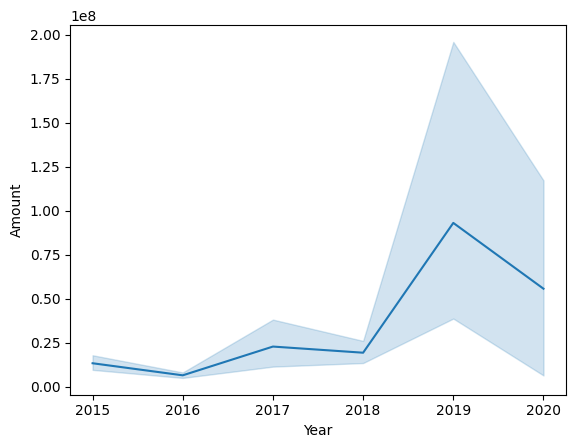

In [68]:
#average investment amount through the years
sns.lineplot(data=df,x='Year',y='Amount')
#plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))


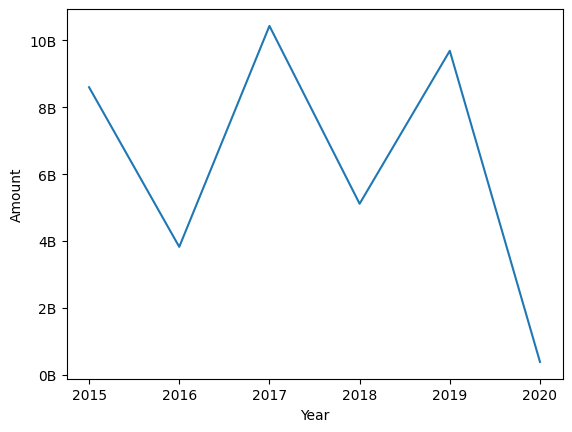

In [69]:
#sum of investment amount per year
yearly_funding=df.groupby('Year')['Amount'].sum().reset_index()
sns.lineplot(data=yearly_funding,x='Year',y='Amount')
#modify amount as 0.2,0.4 (1e10) to 2B,4B (readable format)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

#gca -> Get Current Axes  and to get y axis control using '.yaxis'
#.set_major_formatter -> sets custom formatter for major ticks in yaxis
#mtick.FuncFormatter -> creating own custom formatting function

#10_000_000_000/1e9=10
#x,_ -> x is input amount value in 1e10 format and _ is placeholder for tick position not used
#but added since FuncFormatter passes both.

How many startups funded on each year :-

<Axes: xlabel='Year'>

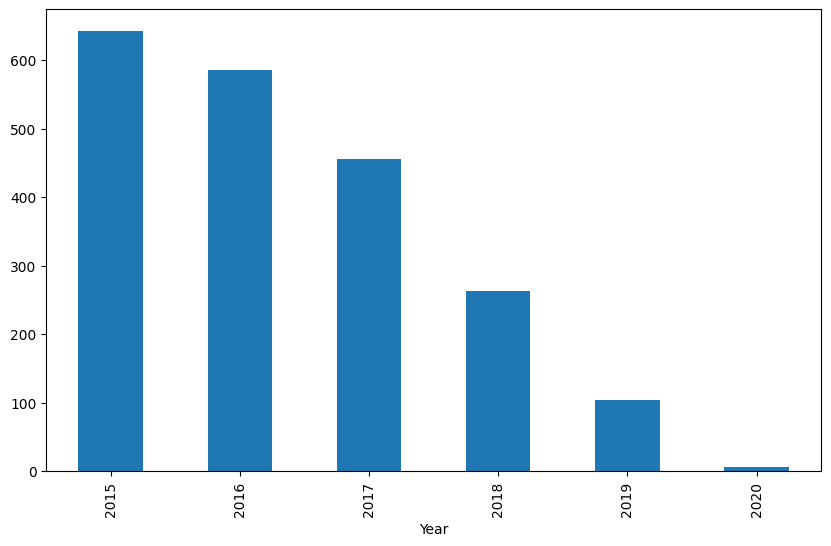

In [70]:
funded_df=df[df['is_funded']==1]
count_per_year=funded_df.groupby('Year').size()
count_per_year.plot(kind='bar',figsize=(10,6))

<Axes: xlabel='Year', ylabel='count'>

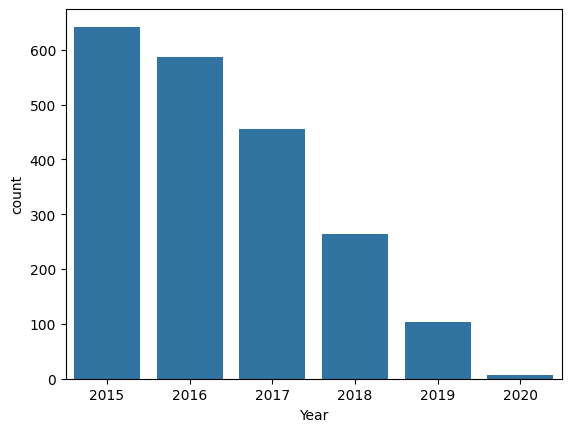

In [71]:
sns.countplot(data=funded_df, x='Year', order=sorted(funded_df['Year'].dropna().unique()))


by considering both amount and count of startups getting investments based on year indicate 
that 

-over the years, fewer startups are getting funded, but with larger cheques 

-2015,2017,2019 the investment amount is higher but the investment's are getting reduced

-EXTERNAL FACTORS like investments got reduced for startups maybe during the COVID period

Do cities play a major role in funding ?

In [72]:
top_cities=df.groupby('City')['Amount'].sum().sort_values(ascending=False)
top_cities.size

111

In [73]:
top_cities=df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)
top_cities.size

10

C:\Users\Admin\AppData\Local\Temp\ipykernel_14536\776004920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities,y=top_cities.index,palette='viridis')


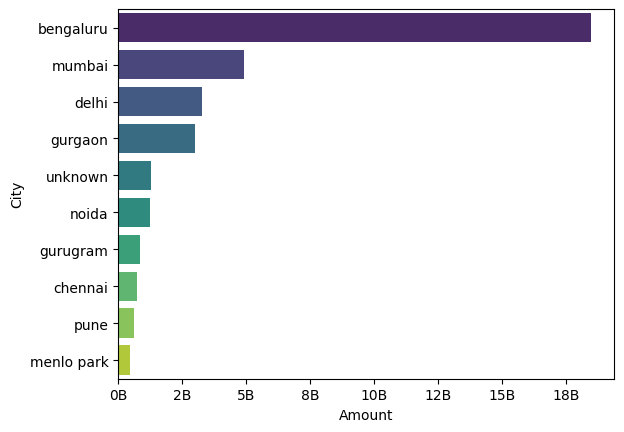

In [74]:
sns.barplot(x=top_cities,y=top_cities.index,palette='viridis')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))


-Bengaluru has the highest investment rate and it crosses 18B

-other other cities falls under 8B and lower

-Next to Bengaluru comes mumbai and delhi.

Investments are more around these areas

In [75]:
top_5_cities=top_cities.head(5)

(np.float64(-1.099998615791698),
 np.float64(1.0999994728091456),
 np.float64(-1.099999801534675),
 np.float64(1.1000000133788166))

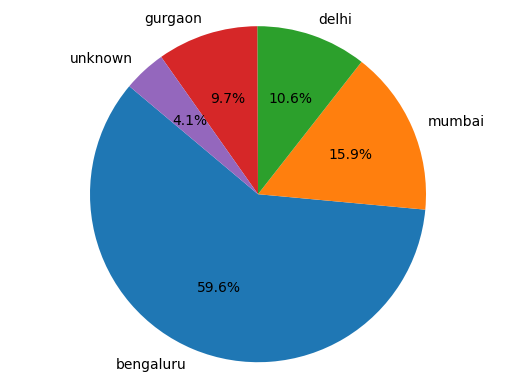

In [76]:
plt.pie(top_5_cities,labels=top_5_cities.index,autopct='%1.1f%%',startangle=140)
plt.axis('equal')

Which industries are favored by investors for funding :-

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                3044 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

Bar chart: Sector vs Total Funding

Bubble chart: Sector vs No. of Funded Startups & Avg Amount

Stacked column: Sector-wise funding per year

In [78]:
top_investors=df['Investors_Cleaned'].value_counts().head(10)
top_investors

Investors_Cleaned
Undisclosed                 171
Ratan Tata                   25
Indian Angel Network         24
Group Of Angel Investors     20
Kalaari Capital              16
Sequoia Capital              15
Accel Partners               12
Saif Partners                12
Venture Catalysts            11
Brand Capital                11
Name: count, dtype: int64

In [79]:
top_investors_amount=df.groupby('Investors_Cleaned')['Amount'].sum().sort_values(ascending=False).head(10)
top_investors_amount

Investors_Cleaned
Westbridge Capital                          3.952000e+09
Softbank                                    2.500000e+09
Softbank Group                              1.467000e+09
Microsoft, Ebay, Tencent Holdings           1.400000e+09
Undisclosed                                 1.024150e+09
Vijay Shekhar Sharma                        1.000150e+09
Steadview Capital And Existing Investors    7.000000e+08
Alibaba Group, Ant Financial                6.800000e+08
Softbank Vision Fund                        6.010000e+08
Altimeter Capital, Dst Global               5.850000e+08
Name: Amount, dtype: float64

In [80]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14536\2371573504.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors_amount.values,y=top_investors_amount.index,palette='coolwarm')


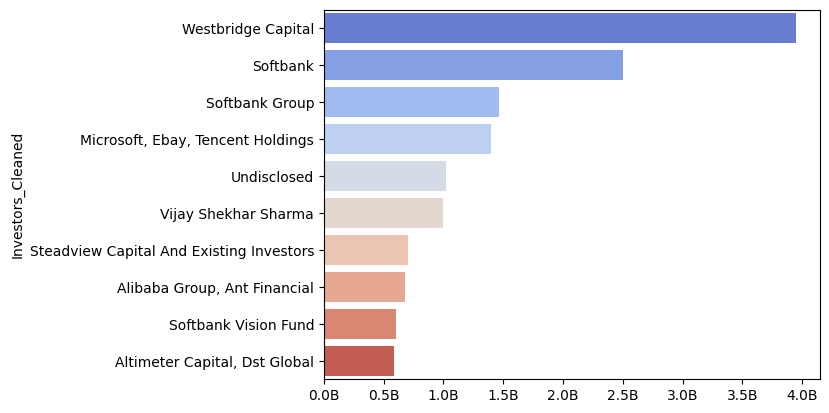

In [81]:
sns.barplot(x=top_investors_amount.values,y=top_investors_amount.index,palette='coolwarm')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))


-Westbridge Capital is the highest investor ranging around 4B

How much funds do startups generally get in India?

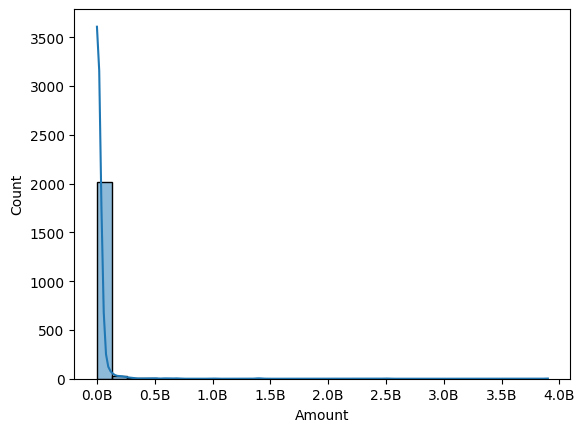

In [82]:
sns.histplot(df['Amount'].dropna(),bins=30,kde=True)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))


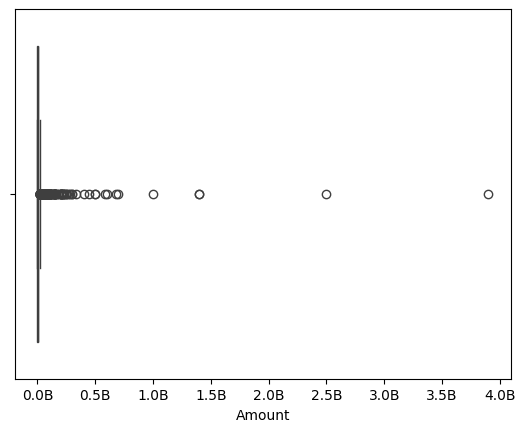

In [83]:
sns.boxplot(x=df['Amount'])
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))


-Extreme outliers over 1B

-In India, most startups receive relatively small funding amounts, with a few receiving disproportionately large investments.

-Majority operate with modest funding, while few has high concentration of capital

-------------------------------------------------------------------------------------------

Feature Engineering

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                3044 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

In [85]:
selected_features = [
    'SubVertical',
    'City',
    'Industry Vertical Cleaned',
    'InvestmentType_Cleaned',
    'Year',
    'Month'
]


In [86]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [87]:
df_model=df[selected_features + ['is_funded']]
df_model.head()

,SubVertical,City,Industry Vertical Cleaned,InvestmentType_Cleaned,Year,Month,is_funded
0,E-learning,bengaluru,technology,Private Equity,2020,1,1
1,App based shuttle service,gurgaon,logistics,Series C,2020,1,1
2,Retailer of baby and toddler products,bengaluru,e-commerce,Series B,2020,1,1
3,Online Investment,delhi,finance,Pre-Series A,2020,1,1
4,Embroiled Clothes For Women,mumbai,others,Seed,2020,1,1


In [88]:
df_model['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [89]:
df['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [90]:
df_encoded=pd.get_dummies(df_model,columns=[ 'SubVertical',
    'City',
    'Industry Vertical Cleaned',
    'InvestmentType_Cleaned'],drop_first=True)

In [91]:
#used in streamlit
import joblib
joblib.dump(df_encoded.columns.tolist(),'encoded_columns.pkl')

['encoded_columns.pkl']

In [92]:
df_encoded

,Year,Month,is_funded,SubVertical_3D Printing Solutions for Edu space,SubVertical_3D printed experimental Human Liver tissue creator,SubVertical_A Doctor-Patient Engagement Platform,"SubVertical_A Local Discovery App For Dining-Out, Party, Leisure and Events",SubVertical_AI Based Expense Management Platform,SubVertical_AI Based Personal Assistant,SubVertical_AI Based Solutions Platform,...,InvestmentType_Cleaned_Equity,InvestmentType_Cleaned_Other,InvestmentType_Cleaned_Pre-Series A,InvestmentType_Cleaned_Private Equity,InvestmentType_Cleaned_Seed,InvestmentType_Cleaned_Series A,InvestmentType_Cleaned_Series B,InvestmentType_Cleaned_Series C,InvestmentType_Cleaned_Series D+,InvestmentType_Cleaned_Venture
0,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2020,1,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3040,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3041,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3042,2015,1,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [93]:
df_encoded

,Year,Month,is_funded,SubVertical_3D Printing Solutions for Edu space,SubVertical_3D printed experimental Human Liver tissue creator,SubVertical_A Doctor-Patient Engagement Platform,"SubVertical_A Local Discovery App For Dining-Out, Party, Leisure and Events",SubVertical_AI Based Expense Management Platform,SubVertical_AI Based Personal Assistant,SubVertical_AI Based Solutions Platform,...,InvestmentType_Cleaned_Equity,InvestmentType_Cleaned_Other,InvestmentType_Cleaned_Pre-Series A,InvestmentType_Cleaned_Private Equity,InvestmentType_Cleaned_Seed,InvestmentType_Cleaned_Series A,InvestmentType_Cleaned_Series B,InvestmentType_Cleaned_Series C,InvestmentType_Cleaned_Series D+,InvestmentType_Cleaned_Venture
0,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2020,1,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2020,1,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3040,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3041,2015,1,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3042,2015,1,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X=df_encoded.drop('is_funded',axis=1)
y=df_encoded['is_funded']

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

--------------------------------------------------------------------------------------------

Using Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
df_encoded['is_funded'].value_counts()

is_funded
1    2065
0     979
Name: count, dtype: int64

In [99]:
X_train=X_train.dropna()
y_train=y_train.loc[X_train.index]

In [100]:
X_test=X_test.dropna()
y_test=y_test.loc[X_test.index]

In [101]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

c:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [102]:
y_pred=log_model.predict(X_test)

In [103]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [104]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [105]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

In [106]:
print(acc)
print(prec)
print(recall)
print(f1)
print(class_report)

0.6639209225700164
0.6956521739130435
0.8953771289537713
0.7829787234042553
              precision    recall  f1-score   support

           0       0.45      0.18      0.26       196
           1       0.70      0.90      0.78       411

    accuracy                           0.66       607
   macro avg       0.57      0.54      0.52       607
weighted avg       0.62      0.66      0.61       607



In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': stats.loguniform(0.01, 100),
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000,class_weight='balanced')

random_search = RandomizedSearchCV(log_reg, param_dist, n_iter=20, cv=3, scoring='f1', n_jobs=-1, random_state=42, verbose=3)
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

best_log_reg = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'C': np.float64(8.471801418819979), 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score: 0.7661395884933538


In [108]:
y_pred_log_cv=random_search.predict(X_test)

In [109]:
acc_logcv=accuracy_score(y_test,y_pred_log_cv)
prec_logcv=precision_score(y_test,y_pred_log_cv)
recall_logcv=recall_score(y_test,y_pred_log_cv)
f1_logcv=f1_score(y_test,y_pred_log_cv)
class_report_logcv=classification_report(y_test,y_pred_log_cv)

In [110]:
print(acc_logcv)
print(prec_logcv)
print(recall_logcv)
print(f1_logcv)
print(class_report_logcv)

0.6293245469522241
0.6852589641434262
0.8369829683698297
0.7535596933187295
              precision    recall  f1-score   support

           0       0.36      0.19      0.25       196
           1       0.69      0.84      0.75       411

    accuracy                           0.63       607
   macro avg       0.52      0.52      0.50       607
weighted avg       0.58      0.63      0.59       607



Using Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

acc_rf=accuracy_score(y_test,y_pred_rf)
print(acc_rf)

0.6589785831960461


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42,class_weight='balanced')

rand_search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)
rand_search.fit(X_train, y_train)



best_rf = rand_search.best_estimator_


c:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\lib\site-packages\sklearn\base.py", line 1382,

In [113]:
print("Best params:", rand_search.best_params_)
print("Best F1 score:", rand_search.best_score_)


Best params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best F1 score: 0.7341465863641365


In [114]:

best_rf = rand_search.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=40,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [115]:
y_pred_rf_cv=best_rf.predict(X_test)

In [116]:
acc_rfcv=accuracy_score(y_test,y_pred_rf_cv)
prec_rfcv=precision_score(y_test,y_pred_rf_cv)
recall_rfcv=recall_score(y_test,y_pred_rf_cv)
f1_rfcv=f1_score(y_test,y_pred_rf_cv)
class_report_rfcv=classification_report(y_test,y_pred_rf_cv)

In [117]:
print(acc_rfcv)
print(prec_rfcv)
print(recall_rfcv)
print(f1_rfcv)
print(class_report_rfcv)

0.627677100494234
0.7650429799426934
0.6496350364963503
0.7026315789473684
              precision    recall  f1-score   support

           0       0.44      0.58      0.50       196
           1       0.77      0.65      0.70       411

    accuracy                           0.63       607
   macro avg       0.60      0.62      0.60       607
weighted avg       0.66      0.63      0.64       607



Even though Logistic Regression has higher class 1 recall, your real-world use case (e.g., predicting if a startup won't get funded) needs both classes to be handled well.

-So balanced RandomForestClassifier might be best method so solve the problem


Text(0.5, 1.0, 'confusion matrix - random forest')

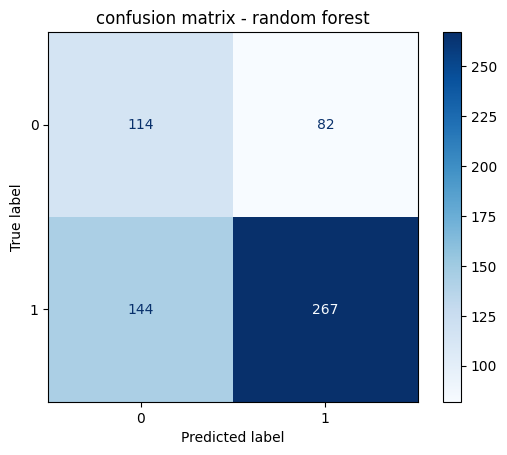

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_rf_cv)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('confusion matrix - random forest')

Text(0, 0.5, 'True Positive Rate')

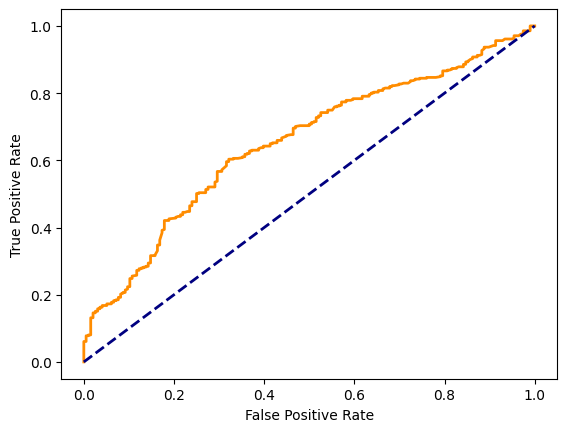

In [119]:
from sklearn.metrics import roc_curve, auc

y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance Level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [120]:
roc_auc

np.float64(0.6514970951884403)

In [121]:
#ROC — Receiver Operating Characteristic curve
#AUC — Area Under the ROC Curve (0-1)

#auc finds the area under the curve
#The auc value is 0.65 fair but not good
#smote method can be used to identify more on the model building part

Save model using joblib

In [122]:
import joblib

joblib.dump(best_rf,'startup_rf.pkl')

['startup_rf.pkl']

lets make it representable using streamlit

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3036 non-null   datetime64[ns]
 1   Startup Name               3044 non-null   object        
 2   SubVertical                3044 non-null   object        
 3   City                       3044 non-null   object        
 4   Amount                     2065 non-null   float64       
 5   is_funded                  3044 non-null   int64         
 6   Year                       3036 non-null   Int64         
 7   Month                      3036 non-null   Int64         
 8   Industry Vertical Cleaned  3044 non-null   object        
 9   InvestmentType_Cleaned     3044 non-null   object        
 10  Investors_Cleaned          3044 non-null   object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(6)
memor

In [124]:
!pip install streamlit

You should consider upgrading via the 'C:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [125]:
df.to_csv('startup_cleaned.csv',index=False)

In [126]:
subvertical_options = df['SubVertical'].unique().tolist()
city_options = df['City'].unique().tolist()
industry_options = df['Industry Vertical Cleaned'].unique().tolist()
investment_type_options = df['InvestmentType_Cleaned'].unique().tolist()


Use SMOTE 

In [129]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


You should consider upgrading via the 'C:\Users\Admin\Desktop\Madhu\udemyproject\passwordstrength\drive-download-20250514T024323Z-1-001\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [131]:
X_train.isnull().sum().sort_values(ascending=False).head()


Year                                               6
Month                                              6
Industry Vertical Cleaned_media & entertainment    0
Industry Vertical Cleaned_logistics                0
SubVertical_AI based Fashion Search Portal         0
dtype: int64

In [132]:
from sklearn.impute import SimpleImputer

# Impute year and month only
imputer = SimpleImputer(strategy='most_frequent')

# Make sure you're only imputing year and month
X_train[['Year', 'Month']] = imputer.fit_transform(X_train[['Year', 'Month']])


In [133]:
X_train.isnull().sum().sort_values(ascending=False).head()


InvestmentType_Cleaned_Venture                                    0
Year                                                              0
Month                                                             0
SubVertical_3D Printing Solutions for Edu space                   0
SubVertical_3D printed experimental Human Liver tissue creator    0
dtype: int64

In [136]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


In [137]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [138]:
X_test_imputed = imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)


In [139]:
from sklearn.ensemble import RandomForestClassifier

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [140]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.625615763546798
              precision    recall  f1-score   support

           0       0.44      0.58      0.50       196
           1       0.77      0.65      0.70       413

    accuracy                           0.63       609
   macro avg       0.60      0.61      0.60       609
weighted avg       0.66      0.63      0.64       609



In [141]:
import joblib

joblib.dump(model, 'rf_model_smote.pkl')
joblib.dump(X_train.columns, 'encoded_columns.pkl')  # for Streamlit input processing


['encoded_columns.pkl']